In [1]:
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]
    

In [3]:
from sklearn.metrics import make_scorer,fbeta_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%matplotlib inline

In [4]:
import pandas as pd

In [5]:
pred_data = pd.read_csv("lung_cancer_pred.csv")

In [6]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 3 columns):
id               947 non-null object
PredictedProb    947 non-null float64
Actual           947 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.3+ KB


In [7]:
def precision_recall_threshold(data_test,t=0.5):
    
    # ge.nerate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    print("Threshold : {}".format(t))
    data_test['AdjustedClass'] = adjusted_classes(data_test['PredictedProb'], t)
    print(pd.DataFrame(confusion_matrix(data_test['Actual'],data_test['AdjustedClass'],labels=[1,0]),
                       columns=['Pred_Cancer', 'Pred_No_Cancer'], 
                       index=['Cancer', 'No_Cancer']))
    cp_LR_UpT = classification_report(data_test['Actual'],data_test['AdjustedClass'])
    print(cp_LR_UpT)

In [8]:
precision_recall_threshold(pred_data,0.65)

Threshold : 0.65
           Pred_Cancer  Pred_No_Cancer
Cancer             383             236
No_Cancer          162             166
              precision    recall  f1-score   support

           0       0.41      0.51      0.45       328
           1       0.70      0.62      0.66       619

    accuracy                           0.58       947
   macro avg       0.56      0.56      0.56       947
weighted avg       0.60      0.58      0.59       947



In [14]:
from sklearn.metrics import precision_recall_curve

In [14]:
roc_curve(pred_data['Actual'],pred_data['PredictedProb'])

(array([0.        , 0.        , 0.        , 0.00304878, 0.00304878,
        0.00609756, 0.00609756, 0.00914634, 0.00914634, 0.0152439 ,
        0.0152439 , 0.01829268, 0.01829268, 0.02439024, 0.02439024,
        0.0304878 , 0.0304878 , 0.03353659, 0.03353659, 0.03658537,
        0.03658537, 0.03963415, 0.03963415, 0.04268293, 0.04268293,
        0.04573171, 0.04573171, 0.04878049, 0.04878049, 0.05182927,
        0.05182927, 0.05487805, 0.05487805, 0.05792683, 0.05792683,
        0.06097561, 0.06097561, 0.06402439, 0.06402439, 0.07012195,
        0.07012195, 0.07317073, 0.07317073, 0.07926829, 0.07926829,
        0.08231707, 0.08231707, 0.08536585, 0.08536585, 0.08841463,
        0.08841463, 0.0945122 , 0.0945122 , 0.10060976, 0.10060976,
        0.10365854, 0.10365854, 0.10670732, 0.10670732, 0.1097561 ,
        0.1097561 , 0.11280488, 0.11280488, 0.11890244, 0.11890244,
        0.12195122, 0.12195122, 0.125     , 0.125     , 0.12804878,
        0.12804878, 0.13109756, 0.13109756, 0.13

In [9]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(pred_data['Actual'],pred_data['PredictedProb'])

In [10]:
# calculate AUC
auc = roc_auc_score(pred_data['Actual'],pred_data['PredictedProb'])
print('AUC: %.3f' % auc)

AUC: 0.590


In [12]:
lr_fpr, lr_tpr, _ = roc_curve(pred_data['Actual'],pred_data['PredictedProb'])

In [15]:
lr_precision, lr_recall, _ = precision_recall_curve(pred_data['Actual'],pred_data['PredictedProb'])

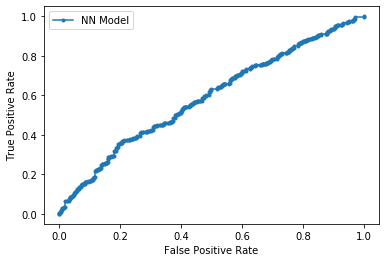

In [13]:
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='NN Model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()

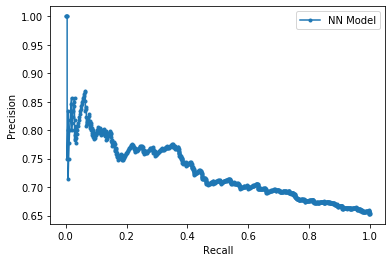

In [16]:
pyplot.plot(lr_recall, lr_precision, marker='.', label='NN Model')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()